In [6]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

data = pd.read_csv("microdata.csv")

data['c_birth_year']=pd.to_datetime(data['c_birth_date']).dt.year


data.drop(columns=['c_birth_date', 'marr_date', 'gr_m_community'], inplace=True)

In [28]:
data_model_a = data[['m_annual_salary_tm2', 'gr_m_family_status']][data['m_annual_salary_tm2']>0]

data_model_a['gr_m_family_status'][data_model_a['gr_m_family_status']>2]=1

data_model_a['gr_m_family_status']=pd.Categorical(data_model_a['gr_m_family_status'])
#np.array([status - 1 for status in data_model_a['gr_m_family_status']])

       Formula: m_annual_salary_tm2 ~ gr_m_family_status
        Family: gaussian
          Link: mu = identity
  Observations: 27073
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 15506.2755, sigma: 34565.5926)
            gr_m_family_status ~ Normal(mu: 0.0, sigma: 47565.2451)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 9498.0239)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [m_annual_salary_tm2_sigma, Intercept, gr_m_family_status]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'gr_m_family_status'}>,
        <Axes: title={'center': 'gr_m_family_status'}>],
       [<Axes: title={'center': 'm_annual_salary_tm2_sigma'}>,
        <Axes: title={'center': 'm_annual_salary_tm2_sigma'}>]],
      dtype=object)

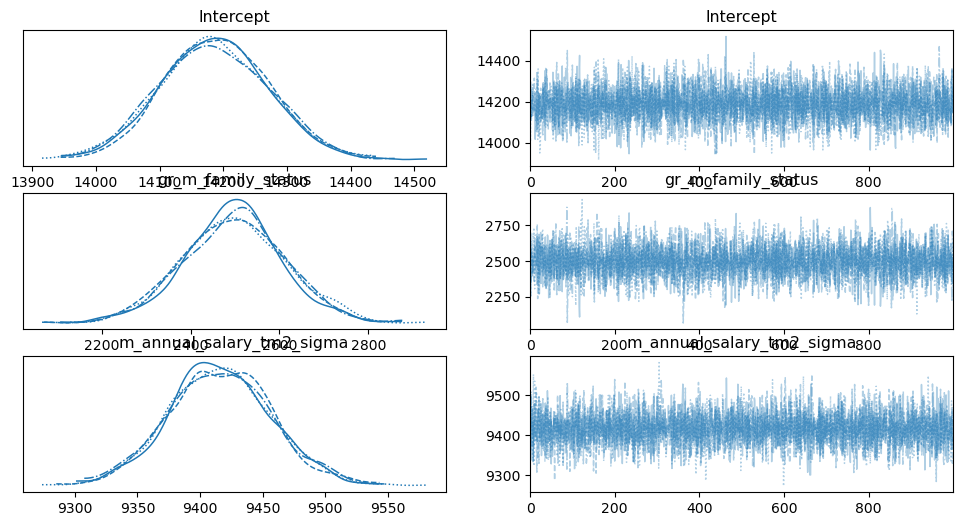

In [29]:
# Initialize the fixed effects only model
model_a = bmb.Model('m_annual_salary_tm2 ~ gr_m_family_status',
                  data_model_a)

# Get model description
print(model_a)

# Fit the model using 1000 on each chain
results = model_a.fit(draws=1000)

# Key summary and diagnostic info on the model parameters
az.summary(results)

# Use ArviZ to plot the results
az.plot_trace(results)

Modeling the probability that gr_m_family_status==1


       Formula: gr_m_family_status ~ m_annual_salary_tm2
        Family: bernoulli
          Link: p = logit
  Observations: 27073
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 4.7863)
            m_annual_salary_tm2 ~ Normal(mu: 0.0, sigma: 0.0003)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, m_annual_salary_tm2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5626 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'm_annual_salary_tm2'}>,
        <Axes: title={'center': 'm_annual_salary_tm2'}>]], dtype=object)

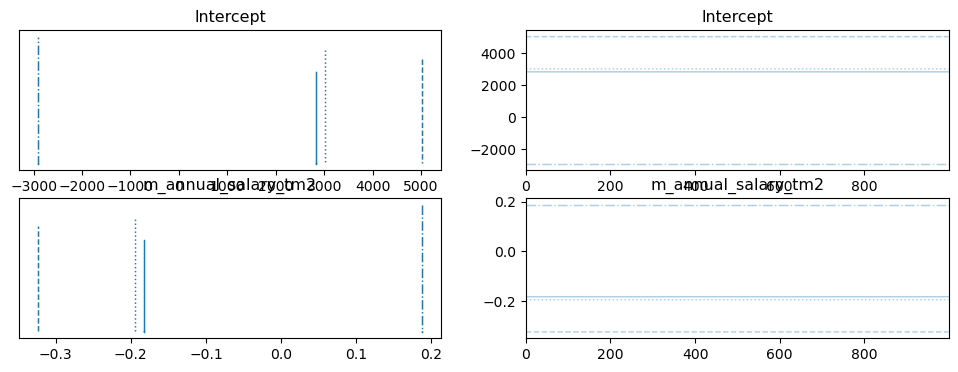

In [36]:
# Initialize the fixed effects only model
model_b = bmb.Model('gr_m_family_status ~ m_annual_salary_tm2',
                   data_model_a,
                   family="bernoulli")

# Get model description
print(model_b)

# Fit the model using 1000 on each chain
results_b = model_b.fit(draws=1000)

# Key summary and diagnostic info on the model parameters
az.summary(results_b)

# Use ArviZ to plot the results
az.plot_trace(results_b)

In [38]:
az.summary(results_b)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1986.008,2956.359,-2912.364,5019.361,1472.255,1127.278,5.0,33.0,2.85
m_annual_salary_tm2,-0.128,0.191,-0.324,0.188,0.095,0.073,5.0,33.0,2.85


The

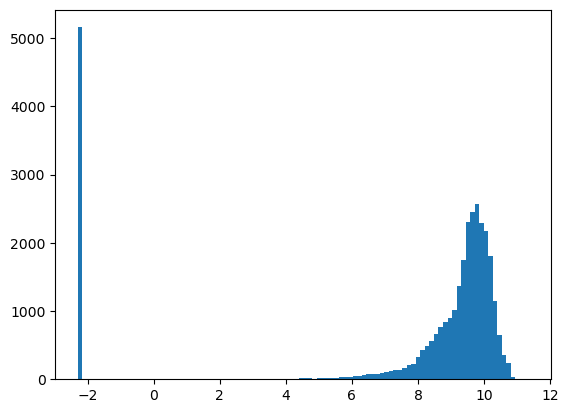

In [56]:
salary_logged = np.log(data['m_annual_salary_tm2'] + 0.1)

plt.hist(salary_logged, bins=100);